In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import initializers


In [10]:
def get_deep_model(lr=0.1, layers=10, input_dim=2):
    model = Sequential()
    model.add(Dense(3, name='D1', input_dim=input_dim, kernel_initializer=initializers.RandomNormal(stddev=0.5), 
                    bias_initializer=initializers.RandomNormal(stddev=0.5)))
    model.add(Activation('sigmoid', name='A1'))
    for i in range(layers-2):
        model.add(Dense(2, name=f'D{i+2}', kernel_initializer=initializers.RandomNormal(stddev=0.5), 
                        bias_initializer=initializers.RandomNormal(stddev=0.5)))
        model.add(Activation('sigmoid', name=f'A{i+2}'))
    model.add(Dense(3,  name=f'D{i+3}', kernel_initializer=initializers.RandomNormal(stddev=0.5), 
                    bias_initializer=initializers.RandomNormal(stddev=0.5)))
    model.add(Activation('softmax', name='P_est'))
    model.compile(SGD(lr=lr), loss='mse')
    model.save('deep_model.hdf5')
    return model


In [11]:
model = get_deep_model(layers=20)
model = load_model('deep_model.hdf5')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D1 (Dense)                   (None, 3)                 9         
_________________________________________________________________
A1 (Activation)              (None, 3)                 0         
_________________________________________________________________
D2 (Dense)                   (None, 2)                 8         
_________________________________________________________________
A2 (Activation)              (None, 2)                 0         
_________________________________________________________________
D3 (Dense)                   (None, 2)                 6         
_________________________________________________________________
A3 (Activation)              (None, 2)                 0         
_________________________________________________________________
D4 (Dense)                   (None, 2)                

In [13]:
def get_grad(model, layer, X = np.array([[3.4, 2.1]]), P_true = np.array([[1, 0, 0]])):

    inputs = tf.constant(X)

    with tf.GradientTape() as tape:
        preds = model(inputs)
        loss = model.loss(tf.constant(P_true), preds)

    grads = tape.gradient(loss, model.get_layer(layer).trainable_variables)
    return grads

In [14]:
grads = []
for i in range(20):
    g = get_grad(model, f'D{i+1}')[0][0].numpy()
    grads.append(np.abs(g).mean())

In [15]:
from matplotlib import pyplot as plt

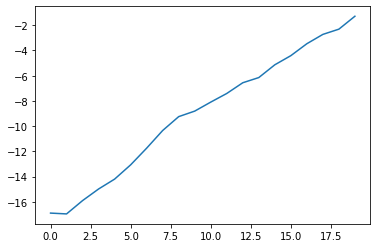

In [16]:
plt.plot(np.log10(grads))

In [51]:
grads[0]

8.844711e-19